In [2]:
import nltk
import numpy as np
from gensim.models import word2vec

In [4]:
import codecs
corpus = u""
book1 = codecs.open('got1.txt', 'r', "utf-8")
book2 = codecs.open('got2.txt', 'r', "utf-8")
book3 = codecs.open('got3.txt', 'r', "utf-8")
book4 = codecs.open('got4.txt', 'r', "utf-8")
book5 = codecs.open('got5.txt', 'r', "utf-8")

corpus += book1.read()
print(len(corpus), " after first book")
corpus += book2.read()
print(len(corpus), " after second book")
corpus += book3.read()
print(len(corpus), " after thirst book")
corpus += book4.read()
print(len(corpus), " after forth book")
corpus += book5.read()
print(len(corpus), " after fifth book")

1768659  after first book
4065904  after second book
5922012  after thirst book
7634356  after forth book
9243933  after fifth book


In [7]:
import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [8]:
raw_sen = tokenizer.tokenize(corpus)

In [12]:
for i in range(0, 3):
    print(raw_sen[i])


The comet’s tail spread across the dawn, a red slash that bled above the crags of Dragonstone like a wound in the pink and purple sky.
The maester stood on the windswept balcony outside his chambers.
It was here the ravens came, after long flight.


In [17]:
#cleaning the corpus a bit
def sentence_to_wordlist(sentence):
    no_tabs = str(sentence).replace('\t', ' ').replace('\n', ' ');
    
        #Remove all characters except A-Z and a dot.
    alphas_only = re.sub("[^a-zA-Z\.]", " ", no_tabs);
        
        #Normalize spaces to 1
    multi_spaces = re.sub(" +", " ", alphas_only);
        
        #Strip trailing and leading spaces
    no_spaces = multi_spaces.strip();
        
        #Normalize all charachters to lowercase
    clean_text = no_spaces.lower();
    words = clean_text.split()
    return words

In [20]:
import re
sentences = []
for raw_sentence in raw_sen:
    if len(raw_sentence) > 1:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [22]:
sentences[1]

['the',
 'maester',
 'stood',
 'on',
 'the',
 'windswept',
 'balcony',
 'outside',
 'his',
 'chambers.']

In [26]:
import multiprocessing

In [27]:
num_features = 300    # Dimensionality of the hidden layer representation
min_word_count = 3   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 7          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words
seed=1
# Initialize and train the model. 
#The LineSentence object allows us to pass in a file name directly as input to Word2Vec,
#instead of having to read it into memory first.

print("Training model...");
#model = word2vec.Word2Vec(sentences, workers=num_workers, \
#            size=num_features, min_count = min_word_count, \
#            window = context, sample = downsampling);

model = word2vec.Word2Vec(sentences=sentences,
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context,
    sample=downsampling
)

Training model...


In [28]:
model_name = "gotWord2Vec.bin";
model.save(model_name);


In [30]:
len(model.wv.vocab)

18676

In [32]:
len(model['king'])

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


300

In [34]:
from sklearn.decomposition import PCA
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/home/therochvoices/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [39]:
import matplotlib.pyplot as plt

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


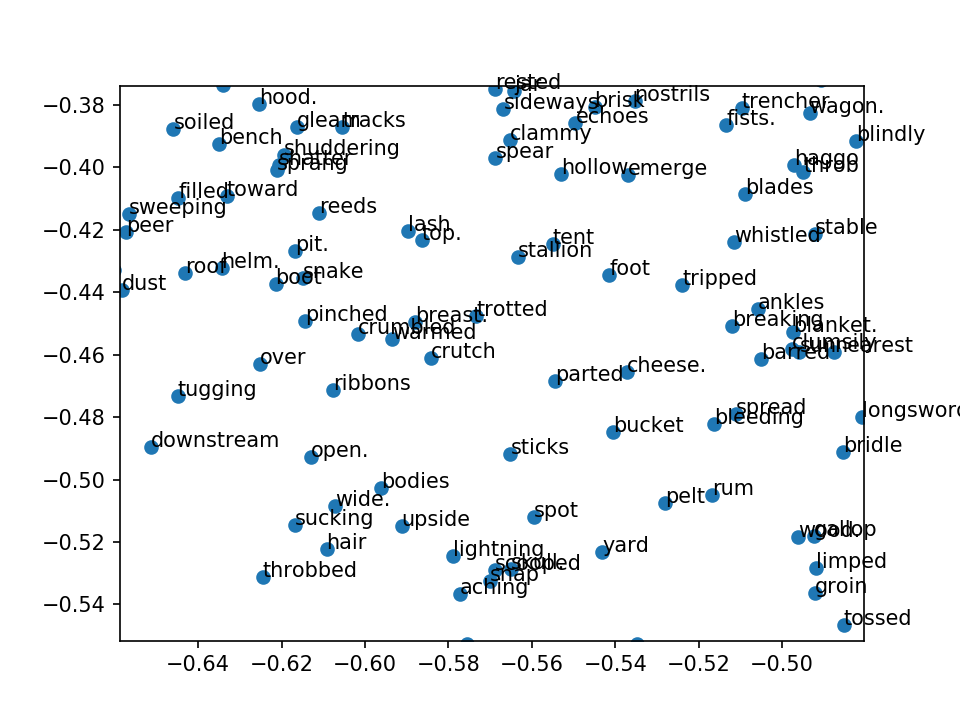

In [46]:
%matplotlib
words = list(model.wv.vocab)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))